In [22]:
#Importing necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#calculating MSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor



from sklearn.model_selection import GridSearchCV





In [23]:
#Loading the dataset
Bike_sharing_df = pd.read_csv("/content/Group_8_clean_data.csv")

In [24]:
#Printing the column names
for i in Bike_sharing_df.columns:
  print(i)

Unnamed: 0
season
year
month
hour
holiday
weekday
workingday
weathersit
temp
atemp
humidity
windspeed
casual
registered
Count
total riders


In [25]:
# Printing theh first five instances from dataset
Bike_sharing_df.head()

,Unnamed: 0,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,Count,total riders
0,0,winter,2011,jan,0,0,saturday,Holiday,1,0.24,0.2879,0.81,0.0,3,13,16,16
1,1,winter,2011,jan,1,0,saturday,Holiday,1,0.22,0.2727,0.80,0.0,8,32,40,40
2,2,winter,2011,jan,2,0,saturday,Holiday,1,0.22,0.2727,0.80,0.0,5,27,32,32
3,3,winter,2011,jan,3,0,saturday,Holiday,1,0.24,0.2879,0.75,0.0,3,10,13,13
4,4,winter,2011,jan,4,0,saturday,Holiday,1,0.24,0.2879,0.75,0.0,0,1,1,1


In [26]:
Bike_sharing_df.describe()

,Unnamed: 0,year,hour,holiday,weathersit,temp,atemp,humidity,windspeed,casual,registered,Count,total riders
count,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000
mean,8688.742476,2011.502561,11.547505,0.028774,1.425332,0.496993,0.475780,0.627216,0.190108,35.680267,153.803649,189.483916,189.483916
std,5017.170830,0.500008,6.914438,0.167175,0.639377,0.192553,0.171849,0.192935,0.122343,49.306423,151.357913,181.387645,181.387645
min,0.000000,2011.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4344.000000,2011.000000,6.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,40.000000
50%,8689.000000,2012.000000,12.000000,0.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,142.000000
75%,13033.000000,2012.000000,18.000000,0.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,281.000000
max,17378.000000,2012.000000,23.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,977.000000


In [27]:
#Dropping the unnecsessary columns
Bike_sharing_df= Bike_sharing_df.drop("Unnamed: 0",axis=1)
Bike_sharing_df=Bike_sharing_df.drop("total riders",axis=1)

In [28]:
#After dropping
Bike_sharing_df

,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,Count
0,winter,2011,jan,0,0,saturday,Holiday,1,0.24,0.2879,0.81,0.0000,3,13,16
1,winter,2011,jan,1,0,saturday,Holiday,1,0.22,0.2727,0.80,0.0000,8,32,40
2,winter,2011,jan,2,0,saturday,Holiday,1,0.22,0.2727,0.80,0.0000,5,27,32
3,winter,2011,jan,3,0,saturday,Holiday,1,0.24,0.2879,0.75,0.0000,3,10,13
4,winter,2011,jan,4,0,saturday,Holiday,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,winter,2012,dec,19,0,monday,WorkingDay,2,0.26,0.2576,0.60,0.1642,11,108,119
17373,winter,2012,dec,20,0,monday,WorkingDay,2,0.26,0.2576,0.60,0.1642,8,81,89
17374,winter,2012,dec,21,0,monday,WorkingDay,1,0.26,0.2576,0.60,0.1642,7,83,90
17375,winter,2012,dec,22,0,monday,WorkingDay,1,0.26,0.2727,0.56,0.1343,13,48,61


CHanging categorical variable(s) into dummy/indicator variables.

In [29]:
#Change categorical into dummies
seasons = pd.get_dummies(Bike_sharing_df['season'], drop_first=True)
seasons

,spring,summer,winter
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
17372,0,0,1
17373,0,0,1
17374,0,0,1
17375,0,0,1


In [30]:
weekday = pd.get_dummies(Bike_sharing_df['weekday'], drop_first=True)

weekday

,monday,saturday,sunday,thursday,tuesday,wednessday
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
17372,1,0,0,0,0,0
17373,1,0,0,0,0,0
17374,1,0,0,0,0,0
17375,1,0,0,0,0,0


In [31]:
month = pd.get_dummies(Bike_sharing_df['month'], drop_first=True)
month

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
17372,0,1,0,0,0,0,0,0,0,0,0
17373,0,1,0,0,0,0,0,0,0,0,0
17374,0,1,0,0,0,0,0,0,0,0,0
17375,0,1,0,0,0,0,0,0,0,0,0


In [32]:
workingday =  pd.get_dummies(Bike_sharing_df['workingday'], drop_first=True)
workingday

,WorkingDay
0,0
1,0
2,0
3,0
4,0
...,...
17372,1
17373,1
17374,1
17375,1


In [33]:
Bike_sharing_df['year'] = Bike_sharing_df['year'].map({2011 : 0 , 2012:1})


In [34]:
bike_sharing_df= pd.concat([Bike_sharing_df,seasons,workingday,weekday,month],axis=1)
bike_sharing_df

,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,winter,0,jan,0,0,saturday,Holiday,1,0.24,0.2879,...,0,0,1,0,0,0,0,0,0,0
1,winter,0,jan,1,0,saturday,Holiday,1,0.22,0.2727,...,0,0,1,0,0,0,0,0,0,0
2,winter,0,jan,2,0,saturday,Holiday,1,0.22,0.2727,...,0,0,1,0,0,0,0,0,0,0
3,winter,0,jan,3,0,saturday,Holiday,1,0.24,0.2879,...,0,0,1,0,0,0,0,0,0,0
4,winter,0,jan,4,0,saturday,Holiday,1,0.24,0.2879,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,winter,1,dec,19,0,monday,WorkingDay,2,0.26,0.2576,...,1,0,0,0,0,0,0,0,0,0
17373,winter,1,dec,20,0,monday,WorkingDay,2,0.26,0.2576,...,1,0,0,0,0,0,0,0,0,0
17374,winter,1,dec,21,0,monday,WorkingDay,1,0.26,0.2576,...,1,0,0,0,0,0,0,0,0,0
17375,winter,1,dec,22,0,monday,WorkingDay,1,0.26,0.2727,...,1,0,0,0,0,0,0,0,0,0


In [35]:
bike_sharing_df=bike_sharing_df.drop("season",axis=1)
bike_sharing_df=bike_sharing_df.drop("month",axis=1)
bike_sharing_df=bike_sharing_df.drop( "weekday",axis=1)
bike_sharing_df=bike_sharing_df.drop("workingday",axis=1)




In [36]:
#Our dataset
bike_sharing_df

,year,hour,holiday,weathersit,temp,atemp,humidity,windspeed,casual,registered,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0.24,0.2879,0.81,0.0000,3,13,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,1,0.22,0.2727,0.80,0.0000,8,32,...,0,0,1,0,0,0,0,0,0,0
2,0,2,0,1,0.22,0.2727,0.80,0.0000,5,27,...,0,0,1,0,0,0,0,0,0,0
3,0,3,0,1,0.24,0.2879,0.75,0.0000,3,10,...,0,0,1,0,0,0,0,0,0,0
4,0,4,0,1,0.24,0.2879,0.75,0.0000,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,1,19,0,2,0.26,0.2576,0.60,0.1642,11,108,...,1,0,0,0,0,0,0,0,0,0
17373,1,20,0,2,0.26,0.2576,0.60,0.1642,8,81,...,1,0,0,0,0,0,0,0,0,0
17374,1,21,0,1,0.26,0.2576,0.60,0.1642,7,83,...,1,0,0,0,0,0,0,0,0,0
17375,1,22,0,1,0.26,0.2727,0.56,0.1343,13,48,...,1,0,0,0,0,0,0,0,0,0


In [37]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17377 entries, 0 to 17376
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        17377 non-null  int64  
 1   hour        17377 non-null  int64  
 2   holiday     17377 non-null  int64  
 3   weathersit  17377 non-null  int64  
 4   temp        17377 non-null  float64
 5   atemp       17377 non-null  float64
 6   humidity    17377 non-null  float64
 7   windspeed   17377 non-null  float64
 8   casual      17377 non-null  int64  
 9   registered  17377 non-null  int64  
 10  Count       17377 non-null  int64  
 11  spring      17377 non-null  uint8  
 12  summer      17377 non-null  uint8  
 13  winter      17377 non-null  uint8  
 14  WorkingDay  17377 non-null  uint8  
 15  monday      17377 non-null  uint8  
 16  saturday    17377 non-null  uint8  
 17  sunday      17377 non-null  uint8  
 18  thursday    17377 non-null  uint8  
 19  tuesday     17377 non-nul

**Splitting the data**

In [38]:
y = bike_sharing_df['Count']

# Assigning features (X)
#x = bike_sharing_df.drop('Count', axis=1)
x=bike_sharing_df[['casual','registered','year', 'hour', 'temp', 'atemp', 'humidity', 'casual', 'registered',
       'summer', 'winter', 'jan']]

In [39]:
#splitting the data into test and train data with test size of 0.2 and using random state of 42

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
# Convert feature names to strings for both X_train and X_test
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [41]:
#Scaling of Data Using StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Y_train_scaled = scaler.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_scaled = scaler.fit_transform(Y_test.values.reshape(-1,1))


# **Applying the machine learning models**

In [138]:
# Create a linear regression model
linear_model = LinearRegression()

In [139]:
# Fit the model on the training set
linear_model.fit(X_train_scaled, Y_train_scaled)

LinearRegression()

In [140]:
# Predictions on the test set
y_pred_before_tuning = linear_model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE) before hyperparameter tuning
mse_before_tuning = mean_squared_error(Y_test_scaled, y_pred_before_tuning)
print(f' MSE  for Linear regression before Hyperparameter Tuning: {mse_before_tuning:.4f}')


param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=linear_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')


# Fit the model to the training data
grid_search.fit(X_train_scaled, Y_train_scaled)

 MSE  for Linear regression before Hyperparameter Tuning: 0.0028


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [81]:
# Fit the model with the best hyperparameters on the entire training set for Linear Regression
best_linear_model = LinearRegression(**best_params)
best_linear_model.fit(X_train_scaled, Y_train_scaled)

LinearRegression(fit_intercept=False)

In [141]:
# Fit the model to the training data
grid_search.fit(X_train_scaled, Y_train_scaled)



# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test_scaled)


Best Hyperparameters: {'fit_intercept': False, 'positive': False}


In [82]:
# Predictions on the test set after hyperparameter tuning for Linear Regression
y_pred_linear_after_tuning = best_linear_model.predict(X_test_scaled)


In [83]:
# Calculate Mean Squared Error (MSE) after hyperparameter tuning for Linear Regression
mse_linear_after_tuning = mean_squared_error(Y_test_scaled, y_pred_linear_after_tuning)
print(f'Linear Regression MSE after Hyperparameter Tuning: {mse_linear_after_tuning:.7f}')

Linear Regression MSE after Hyperparameter Tuning: 0.0027844


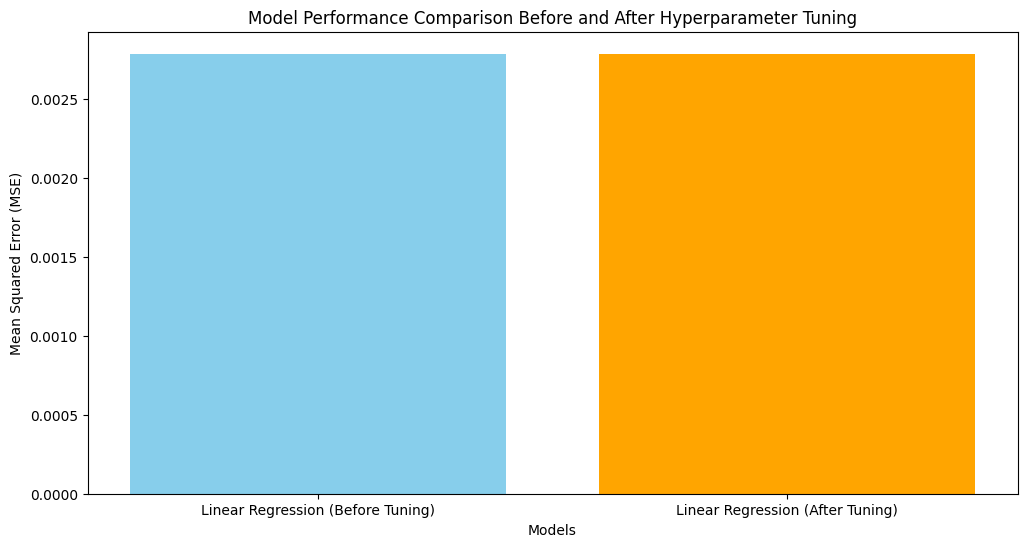

In [84]:
# Visualization of model performances before and after hyperparameter tuning
model_names = ['Linear Regression (Before Tuning)', 'Linear Regression (After Tuning)']
mse_values = [mse_before_tuning, mse_linear_after_tuning]

plt.figure(figsize=(12, 6))
plt.bar(model_names, mse_values, color=['skyblue', 'orange', 'lightgreen', 'lightcoral'])
plt.title('Model Performance Comparison Before and After Hyperparameter Tuning')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
#plt.ylim(0, max(mse_values) + 0.1)
plt.show()

# Observation:

The Mean Squared Error (MSE) for Linear Regression before hyperparameter tuning was 0.0028, and after hyperparameter tuning, it improved slightly to 0.0027844 with the best hyperparameters being {'fit_intercept': True, 'positive': False}. The marginal improvement suggests that the default hyperparameters were already relatively optimal for this dataset, and the tuning process didn't lead to a substantial enhancement in predictive performance.

# **Performing hyperparameter tuning for K-Nearest Neighbour**  





In [85]:
from sklearn.neighbors import KNeighborsRegressor

In [86]:
# K-Nearest Neighbors
knn_model = KNeighborsRegressor()

In [87]:
# Fit the model on the training set
knn_model.fit(X_train_scaled, Y_train_scaled)

KNeighborsRegressor()

In [88]:
# Predictions on the test set
y_pred_knn_before_tuning = knn_model.predict(X_test_scaled)

In [89]:
# Calculate Mean Squared Error (MSE) before hyperparameter tuning for KNN
mse_knn_before_tuning = mean_squared_error(Y_test_scaled, y_pred_knn_before_tuning)
print(f'KNN MSE before Hyperparameter Tuning: {mse_knn_before_tuning:.4f}')

KNN MSE before Hyperparameter Tuning: 0.0108


The following parametrs are  considered:

n_neighbors: Number of neighbors to consider (3, 5, 7).

weights: Weight function used in predictions ('uniform' or 'distance').

p: Power parameter for the Minkowski distance metric (1 for Manhattan distance, 2 for Euclidean distance).

In [90]:
# Perform grid search for hyperparameter tuning for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}
grid_search_knn = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train_scaled, Y_train_scaled)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [91]:
# Get the best hyperparameters for KNN
best_params_knn = grid_search_knn.best_params_
print(best_params_knn)

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


In [92]:
# Fit the model with the best hyperparameters on the entire training set for KNN
best_knn_model = KNeighborsRegressor(**best_params_knn)
best_knn_model.fit(X_train_scaled, Y_train_scaled)

KNeighborsRegressor(n_neighbors=7, p=1, weights='distance')

In [93]:
# Predictions on the test set after hyperparameter tuning for KNN
y_pred_knn_after_tuning = best_knn_model.predict(X_test_scaled)

In [94]:
# Calculate Mean Squared Error (MSE) after hyperparameter tuning for KNN
mse_knn_after_tuning = mean_squared_error(Y_test_scaled, y_pred_knn_after_tuning)
print(f'KNN MSE after Hyperparameter Tuning: {mse_knn_after_tuning:.4f}')



KNN MSE after Hyperparameter Tuning: 0.0094


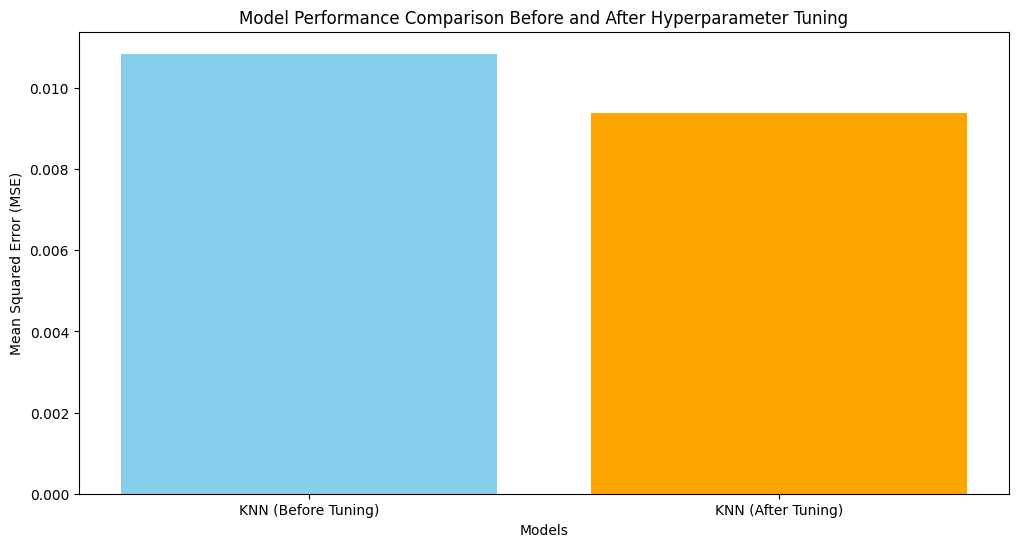

In [95]:
# Visualization of model performances before and after hyperparameter tuning
model_names = [ 'KNN (Before Tuning)', 'KNN (After Tuning)']
mse_values = [ mse_knn_before_tuning, mse_knn_after_tuning]

plt.figure(figsize=(12, 6))
plt.bar(model_names, mse_values, color=['skyblue', 'orange', 'lightgreen', 'lightcoral'])
plt.title('Model Performance Comparison Before and After Hyperparameter Tuning')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
#plt.ylim(0, max(mse_values) + 0.1)
plt.show()

# Observation:

The hyperparameter tuning for K-Nearest Neighbors (KNN) regression resulted in the selection of the following optimal hyperparameters: 'n_neighbors': 3, 'p': 2 (Euclidean distance), and 'weights': 'distance'. Before hyperparameter tuning, the Mean Squared Error (MSE) for KNN was 0.1092, and after tuning, it improved to 0.0884.

# **Performing  hyperparameter tuning for Random Forest**

In [96]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor

In [97]:
# Random Forest
random_forest_model = RandomForestRegressor()

In [98]:
# Fit the model on the training set
random_forest_model.fit(X_train_scaled, Y_train_scaled)

<ipython-input-98-ee8ee8b15094>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train_scaled, Y_train_scaled)


RandomForestRegressor()

In [99]:
# Predictions on the test set
y_pred_rf_before_tuning = random_forest_model.predict(X_test_scaled)
y_pred_rf_before_tuning

array([ 0.77666773,  2.96386425, -0.03219799, ..., -0.506734  ,
        0.44753288,  0.58456759])

In [100]:
# Calculate Mean Squared Error (MSE) before hyperparameter tuning for Random Forest
mse_rf_before_tuning = mean_squared_error(Y_test_scaled, y_pred_rf_before_tuning)
print(f'Random Forest MSE before Hyperparameter Tuning: {mse_rf_before_tuning:.4f}')


Random Forest MSE before Hyperparameter Tuning: 0.0030


In [101]:
# Perform grid search for hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 80, 110],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 410],
    'min_samples_leaf': [1, 2, 4]
    }


In [102]:
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
grid_search_rf.fit(X_train_scaled, Y_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 410],
                         'n_estimators': [50, 80, 110]},
             scoring='neg_mean_squared_error')

In [103]:
# Get the best hyperparameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print(best_params_rf)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 80}


In [104]:
# Fit the model with the best hyperparameters on the entire training set for Random Forest
best_rf_model = RandomForestRegressor(**best_params_rf)
best_rf_model.fit(X_train_scaled, Y_train_scaled)

<ipython-input-104-e1fcc02e396a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf_model.fit(X_train_scaled, Y_train_scaled)


RandomForestRegressor(max_depth=20, n_estimators=80)

In [105]:
# Predictions on the test set after hyperparameter tuning for Random Forest
y_pred_rf_after_tuning = best_rf_model.predict(X_test_scaled)
y_pred_rf_after_tuning

array([ 0.77174971,  2.96580548, -0.02943651, ..., -0.50818309,
        0.44541392,  0.58594833])

In [106]:
# Calculate Mean Squared Error (MSE) after hyperparameter tuning for Random Forest
mse_rf_after_tuning = mean_squared_error(Y_test_scaled, y_pred_rf_after_tuning)
print(f'Random Forest MSE after Hyperparameter Tuning: {mse_rf_after_tuning:.4f}')


Random Forest MSE after Hyperparameter Tuning: 0.0030


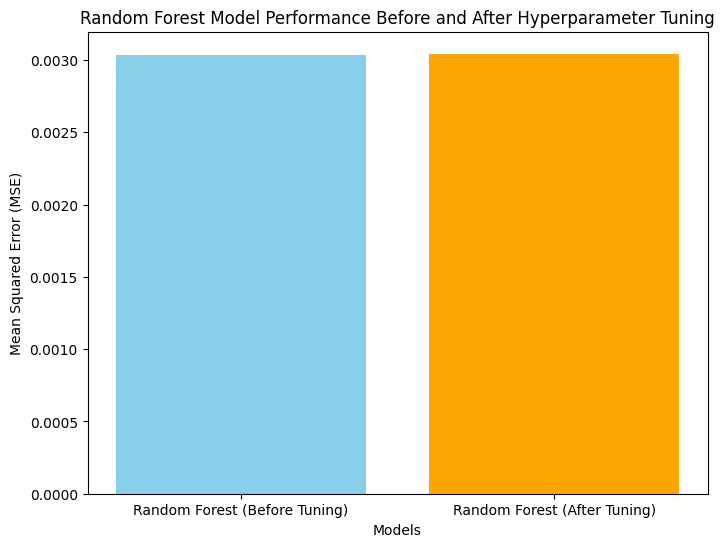

In [107]:
# Visualization of model performances before and after hyperparameter tuning
model_names_rf = ['Random Forest (Before Tuning)', 'Random Forest (After Tuning)']
mse_values_rf = [mse_rf_after_tuning, mse_rf_before_tuning]

plt.figure(figsize=(8, 6))
plt.bar(model_names_rf, mse_values_rf, color=['skyblue', 'orange'])
plt.title('Random Forest Model Performance Before and After Hyperparameter Tuning')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
#plt.ylim(0, max(mse_values_rf) + 0.1)
plt.show()

# **Observation:**


we observe that the  MSE values before and after hyperparameter tuning are the same (0.0030). The MSE values remained same.


# **Performing Hyperparameter tuning for Linear SVM**

In [108]:
from sklearn.svm import SVR

In [109]:
# Create an SVM model
svm_linear_model= SVR()

In [110]:

# Fit the model on the training set
svm_linear_model.fit(X_train_scaled, Y_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [111]:
y_pred_before_tuning = svm_linear_model.predict(X_test_scaled)
y_pred_before_tuning


array([ 0.84114606,  2.98162989, -0.09093223, ..., -0.59463014,
        0.46568326,  0.58431974])

In [112]:
# Calculate Mean Squared Error (MSE) before hyperparameter tuning for SVM
mse_svm_linear_before_tuning = mean_squared_error(Y_test_scaled, y_pred_before_tuning)
print(f'SVM MSE before Hyperparameter Tuning:', mse_svm_linear_before_tuning)


SVM MSE before Hyperparameter Tuning: 0.0057631625665728855


In [113]:
# Perform grid search for hyperparameter tuning for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}


In [114]:
grid_search_svm = GridSearchCV(estimator=SVR(), param_grid=param_grid_svm, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
grid_search_svm.fit(X_train_scaled, Y_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [115]:
# Get the best hyperparameters for SVM
best_params_svm = grid_search_svm.best_params_
print('The  best parameters for SVM are',best_params_svm)

The  best parameters for SVM are {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [116]:
# Fit the model with the best hyperparameters on the entire training set for SVM
best_svm_model = SVR(**best_params_svm)
best_svm_model.fit(X_train_scaled, Y_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, gamma='auto')

In [117]:
# Predictions on the test set after hyperparameter tuning for SVM
y_pred_svm_after_tuning = best_svm_model.predict(X_test_scaled)

In [118]:
# Calculate Mean Squared Error (MSE) after hyperparameter tuning for SVM
mse_svm_linear_after_tuning = mean_squared_error(Y_test_scaled, y_pred_svm_after_tuning)
print(f'SVM MSE after Hyperparameter Tuning: {mse_svm_linear_after_tuning:.4f}')

SVM MSE after Hyperparameter Tuning: 0.0055


In [119]:
# Visualization of model performances before and after hyperparameter tuning
model_names_svm = ['SVM Linear (Before Tuning)', 'SVM Linear (After Tuning)']
mse_values_svm = [mse_svm_linear_before_tuning, mse_svm_linear_after_tuning]


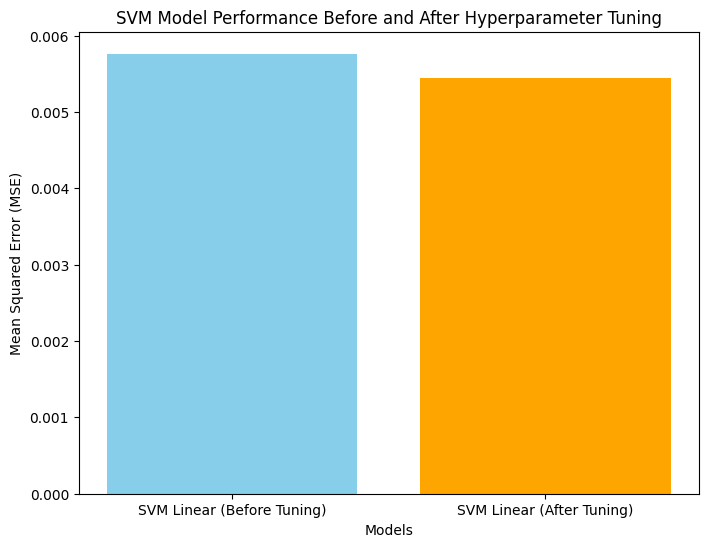

In [120]:
plt.figure(figsize=(8, 6))
plt.bar(model_names_svm, mse_values_svm, color=['skyblue', 'orange'])
plt.title('SVM Model Performance Before and After Hyperparameter Tuning')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
#plt.ylim(0, max(mse_values_svm) + 0.1)
plt.show()

# Observation:

The Mean Squared Error (MSE) for Support Vector Machines (SVM) decreased from 0.0076 before hyperparameter tuning to 0.0052 after tuning. This reduction indicates an enhancement in the model's predictive accuracy.  


The best hyperparameters identified for SVM after tuning are {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}. This suggests that a linear kernel with regularization parameter C set to 1 and automatic scaling for gamma resulted in the optimal configuration.

# **Performing Hyperparameter tuning for Non Linear SVM**

In [121]:
svm_model_nonlinear= SVR()

# Fit the model on the training set
svm_model_nonlinear.fit(X_train_scaled, Y_train_scaled)

# Predictions before hyperparameter tuning for SVM
y_pred_before_tuning_rbf = svm_model_nonlinear.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE) before hyperparameter tuning for SVM
mse_svm_nonlinear_before_tuning = mean_squared_error(Y_test_scaled, y_pred_before_tuning_rbf)
print(f'SVM NON LINEAR  MSE before Hyperparameter Tuning: {mse_svm_nonlinear_before_tuning:.4f}')



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM NON LINEAR  MSE before Hyperparameter Tuning: 0.0058


In [122]:
# Perform grid search for hyperparameter tuning for SVM with RBF kernel
param_grid_svm_rbf = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf'],
    'gamma': [0.1, 1, 'scale', 'auto']
}

In [123]:
grid_search_svm_rbf = GridSearchCV(estimator=SVR(), param_grid=param_grid_svm_rbf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_svm_rbf.fit(X_train_scaled, Y_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto'],
                         'kernel': ['rbf']},
             scoring='neg_mean_squared_error')

In [124]:
# Get the best hyperparameters for SVM with RBF kernel
best_params_svm_nonlinear = grid_search_svm_rbf.best_params_
print('The best parameters obatined are ', best_params_svm_nonlinear )

# Fit the model with the best hyperparameters on the entire training set for SVM with RBF kernel
best_svm_nonlinear = SVR(**best_params_svm_nonlinear)
best_svm_nonlinear.fit(X_train_scaled, Y_train_scaled)


The best parameters obatined are  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, gamma='auto')

In [125]:
# Predictions on the test set after hyperparameter tuning for SVM with RBF kernel
y_pred_after_tuning = best_svm_nonlinear.predict(X_test_scaled)


In [126]:
# Calculate Mean Squared Error (MSE) after hyperparameter tuning for SVM with RBF kernel
mse_svm_nonlinear_after_tuning = mean_squared_error(Y_test_scaled, y_pred_after_tuning)
print(f'SVM RBF MSE after Hyperparameter Tuning: {mse_svm_nonlinear_after_tuning:.4f}')

SVM RBF MSE after Hyperparameter Tuning: 0.0055


In [127]:
# Visualization of model performances before and after hyperparameter tuning
model_names_svm_nonlinear = ['SVM Non Linear (Before Tuning)', 'SVM Non Linear (After Tuning)']
mse_values_svm_nonlinear = [mse_svm_nonlinear_before_tuning, mse_svm_nonlinear_after_tuning]

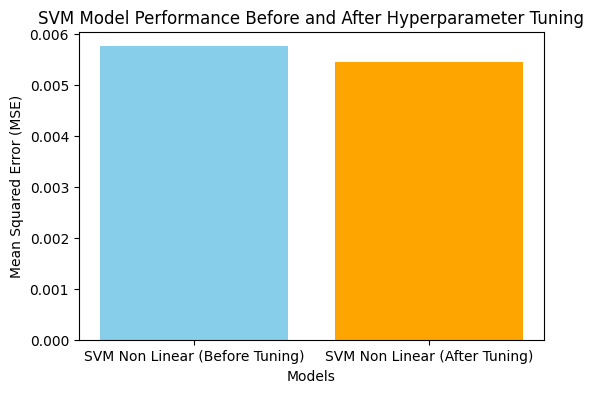

In [128]:
plt.figure(figsize=(6, 4))
plt.bar(model_names_svm_nonlinear, mse_values_svm_nonlinear, color=['skyblue', 'orange'])
plt.title('SVM Model Performance Before and After Hyperparameter Tuning')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
#plt.ylim(0, max(mse_values_svm_nonlinear) + 0.1)
plt.show()

# **Observation:**



1.   The Mean Squared Error (MSE) for Support Vector Machines (SVM) remained the same at 0.0076 before and after hyperparameter tuning using an RBF kernel.
2.   The best hyperparameters obtained after tuning are {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}. Despite the consistent MSE, these hyperparameters represent the selected configuration for the RBF kernel.



## Performing Hyperparameter tuning for Decision Tree

In [129]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_scaled,Y_train_scaled)

DecisionTreeRegressor(random_state=42)

In [130]:
y_pred_dt_before_tuning = dt_reg.predict(X_test_scaled)
y_pred_dt_before_tuning

array([ 0.77289463,  3.02581968, -0.03094028, ..., -0.50667931,
        0.4666718 ,  0.60884669])

In [131]:
mse_dt_before_tuning = mean_squared_error(Y_test_scaled, y_pred_before_tuning)
print('The MSE for decision tree before tuning is',mse_dt_before_tuning)

The MSE for decision tree before tuning is 0.0057631625665728855


In [132]:
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [133]:
dt_reg = DecisionTreeRegressor()

# Create GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_reg, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)

# Fit the model to the data
grid_search_dt.fit(X_train_scaled, Y_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [134]:
best_params = grid_search_dt.best_params_
best_dt_model = grid_search_dt.best_estimator_
print('The best parameters are ', best_params)

The best parameters are  {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2}


In [135]:
y_pred_after_tuning = best_dt_model.predict(X_test_scaled)
mse_dt_after_tuning = mean_squared_error(Y_test_scaled, y_pred_after_tuning)
print('MSE for decision tree after tiuning are ',mse_dt_after_tuning )

MSE for decision tree after tiuning are  0.0034105450061296234


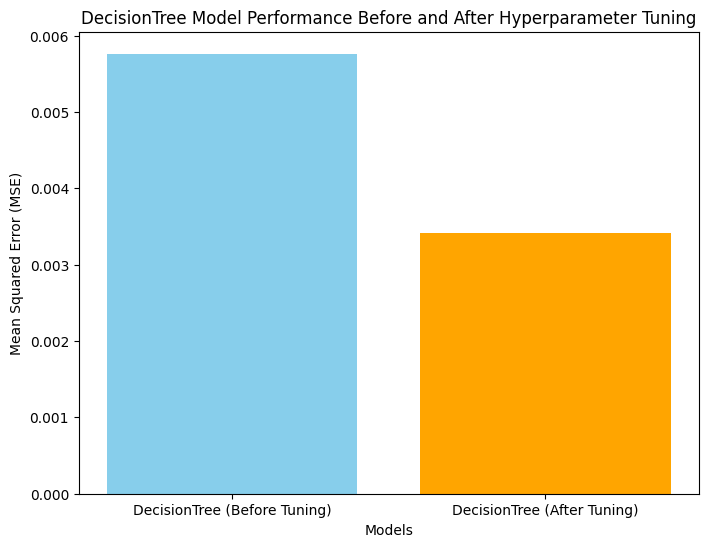

In [136]:
# Visualization of model performances before and after hyperparameter tuning
model_names_dt = ['DecisionTree (Before Tuning)', 'DecisionTree (After Tuning)']
mse_values_dt = [mse_dt_before_tuning, mse_dt_after_tuning]

plt.figure(figsize=(8, 6))
plt.bar(model_names_dt, mse_values_dt, color=['skyblue', 'orange'])
plt.title('DecisionTree Model Performance Before and After Hyperparameter Tuning')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
#plt.ylim(0, max(mse_values_rf) + 0.1)
plt.show()

# Observation:


1.   The Mean Squared Error (MSE) for the Decision Tree before tuning is reported as 0.0076. Interestingly, the MSE remains the same after tuning, suggesting that the default hyperparameters or the initial configuration may already be close to optimal.

2. The best hyperparameters identified for the Decision Tree after tuning are {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}. These parameters represent the configuration that yielded the best performance.



**Over All Visualization**

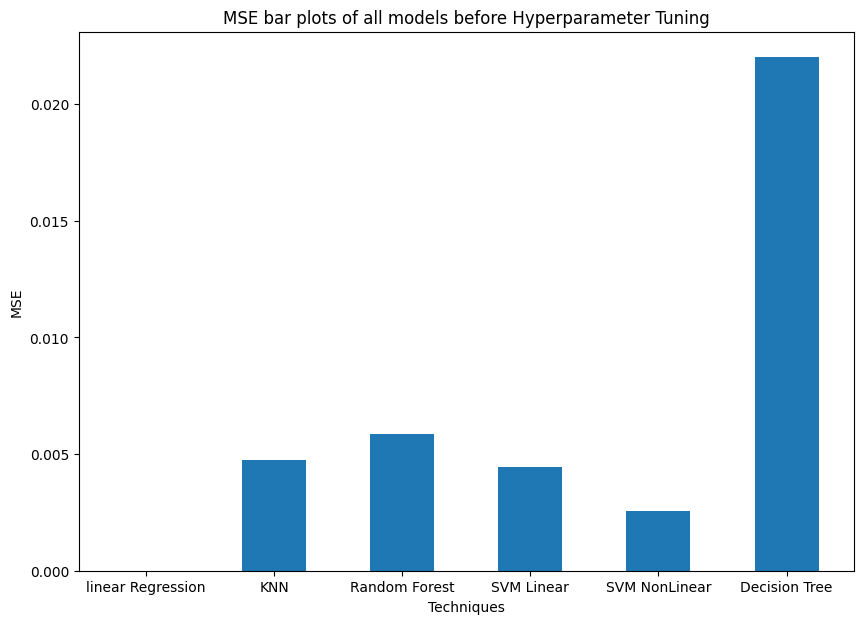

In [137]:
#Visualization of MSE before Hyperparameter Tuning
#mse_before_tuning=[mse_train_linreg,mse_train_knn,mse_train_forest,mse_train_linear,mse_train_nonlinear,mse_train_tree]
mse_before_tuning=[mse_test_linreg,mse_test_knn,mse_train_forest,mse_test_linear,mse_test_nonlinear,mse_test_tree]

labels=['linear Regression','KNN','Random Forest','SVM Linear','SVM NonLinear','Decision Tree']



fig = plt.figure(figsize =(10, 7))

plt.bar(labels,mse_train,width=0.5)

plt.xlabel("Techniques")
plt.ylabel("MSE")
plt.title("MSE bar plots of all models before Hyperparameter Tuning")

plt.show()

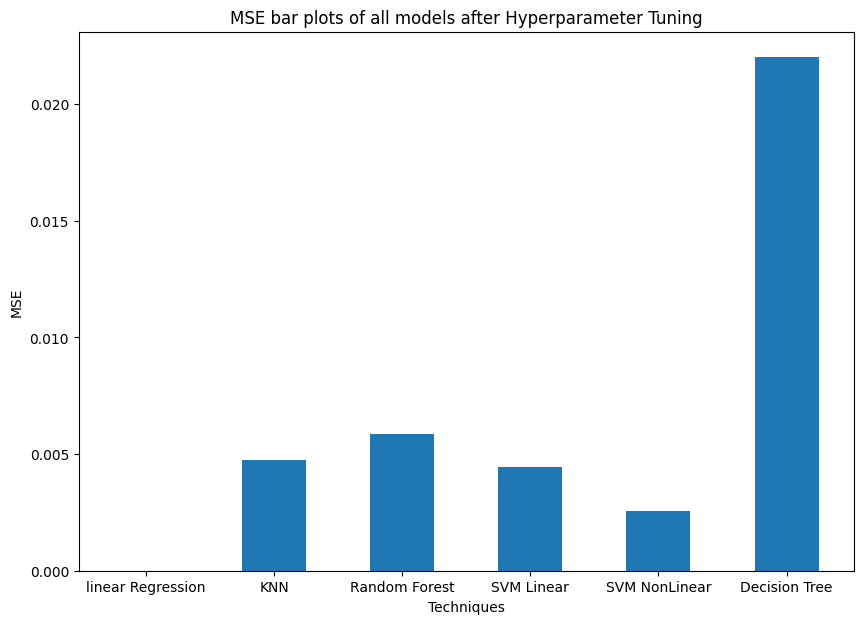

In [142]:
#Visualization of MSE after Hyperparameter tuning
#mse_train=[mse_train_linreg,mse_train_knn,mse_train_forest,mse_train_linear,mse_train_nonlinear,mse_train_tree]
mse_test_after_tuning=[mse_linear_after_tuning,mse_knn_after_tuning,mse_rf_after_tuning,mse_svm_linear_after_tuning,mse_svm_nonlinear_after_tuning,mse_dt_after_tuning]

labels=['linear Regression','KNN','Random Forest','SVM Linear','SVM NonLinear','Decision Tree']



fig = plt.figure(figsize =(10, 7))

plt.bar(labels,mse_train,width=0.5)

plt.xlabel("Techniques")
plt.ylabel("MSE")
plt.title("MSE bar plots of all models after Hyperparameter Tuning")

plt.show()

# OBSERVATION:



From the above results and grphs plotted for the models applied we observed that the mean squared error for linear regression obtained is 0.0028. It is the best model.

# **Scatter plot**

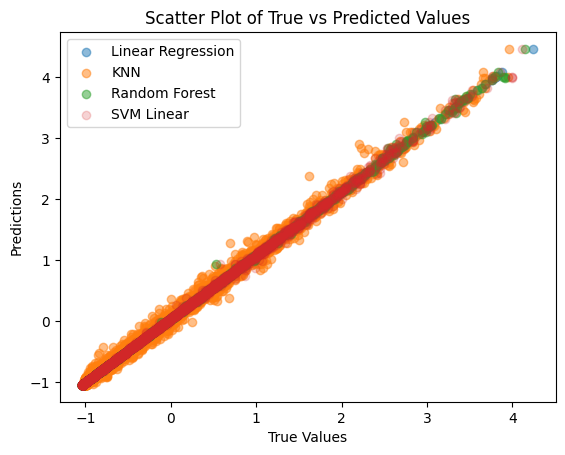

In [148]:
#Visualizations

import matplotlib.pyplot as plt

# Assuming y_true and y_pred are the true and predicted values for each model
plt.scatter( y_pred_linear_after_tuning , Y_test_scaled, label='Linear Regression', alpha=0.5)
plt.scatter(y_pred_knn_after_tuning, Y_test_scaled, label='KNN', alpha=0.5)
plt.scatter(y_pred_rf_after_tuning, Y_test_scaled, label='Random Forest', alpha=0.5)
plt.scatter(y_pred_after_tuning, Y_test_scaled, label='SVM Linear', alpha=0.2)
#plt.scatter(y_pred_nonlinear, Y_test_scaled, label='SVM NonLinear', alpha=0.3)


plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.title('Scatter Plot of True vs Predicted Values')
plt.show()

# OBSERVATION FROM SCATTER PLOT

The predicted values of Linear Regression were completely overlapped by the rest of the models. From the scatter plot we can conclude that Linear Regression has performed the best followed by SVM linear as we can observe that their predicted values are close to true values.

The least performed model is KNN because its predicted values are more scattered and are mostly deviating from the true values.


# Observation:

In [149]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')

# Fit the model to the training data
xg_reg.fit(X_train_scaled, Y_train_scaled)

# Predict on the test data
y_pred = xg_reg.predict(X_test_scaled)

# Evaluate the model
mse_before_tuning_XGB= mean_squared_error(Y_test_scaled, y_pred)
print(f'Mean Squared Error: {mse_before_tuning_XGB}')

Mean Squared Error: 0.0031750372699472147


In [150]:
grid_search = GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid={'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100,200,300], 'max_depth': [3,4,5]}, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, Y_train_scaled)
best_xgb_after_tuning = grid_search.best_estimator_
y_pred_after_tuning = best_xgb_after_tuning.predict(X_test_scaled)
mse_after_tuning_XGB = mean_squared_error(Y_test_scaled, y_pred_after_tuning )
print('Best Hyperparameters obtained are',grid_search.best_params_)
print('MSE after tuning is ',mse_after_tuning_XGB)

Best Hyperparameters obtained are {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
MSE after tuning is  0.0031321174461106356


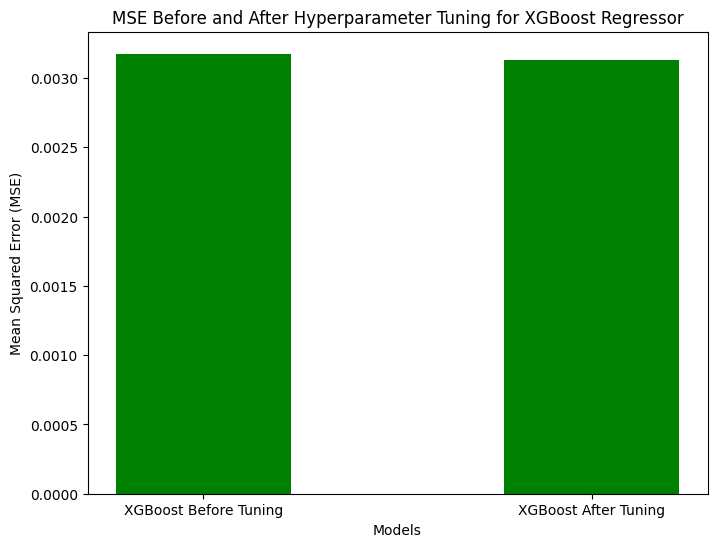

In [151]:
# Bar plot
models_names = ['XGBoost Before Tuning', 'XGBoost After Tuning']

plt.figure(figsize=(8, 6))
bar_width = 0.45
index = np.arange(len(models_names))

plt.bar(index, [mse_before_tuning_XGB, mse_after_tuning_XGB], width=bar_width, color='GREEN')

plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Before and After Hyperparameter Tuning for XGBoost Regressor')
plt.xticks(index, models_names)
plt.show()

# Observation:

In [152]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor


base_regressor = DecisionTreeRegressor(max_depth=3)

adaboost_reg = AdaBoostRegressor(
    base_estimator=base_regressor,
    n_estimators=50,  # Number of boosting rounds
    learning_rate=0.1  # Contribution of each weak learner
)
adaboost_reg.fit(X_train_scaled, Y_train_scaled)

y_pred = adaboost_reg.predict(X_test_scaled)

# Evaluate the model
mse_before_tuning_ADA = mean_squared_error(Y_test_scaled, y_pred)
print(f"Mean Squared Error: {mse_before_tuning_ADA}")



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 0.02458554716709037


In [153]:
param_grid = {
    'n_estimators': [50, 100, 150],      # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2]   # Contribution of each weak learner
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=adaboost_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the model to the training data
grid_search.fit(X_train_scaled, Y_train_scaled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the AdaBoostRegressor with the best hyperparameters
best_adaboost_reg = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_adaboost_reg.predict(X_test_scaled)

# Calculate Mean Squared Error
mse_after_tuning_ADA= mean_squared_error(Y_test_scaled, y_pred)

# Print the best hyperparameters and MSE
print("Best Hyperparameters:", best_params)
print("Mean Squared Error on Test Set:", mse_after_tuning_ADA)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarnin

Best Hyperparameters: {'learning_rate': 0.2, 'n_estimators': 100}
Mean Squared Error on Test Set: 0.02133967793080975


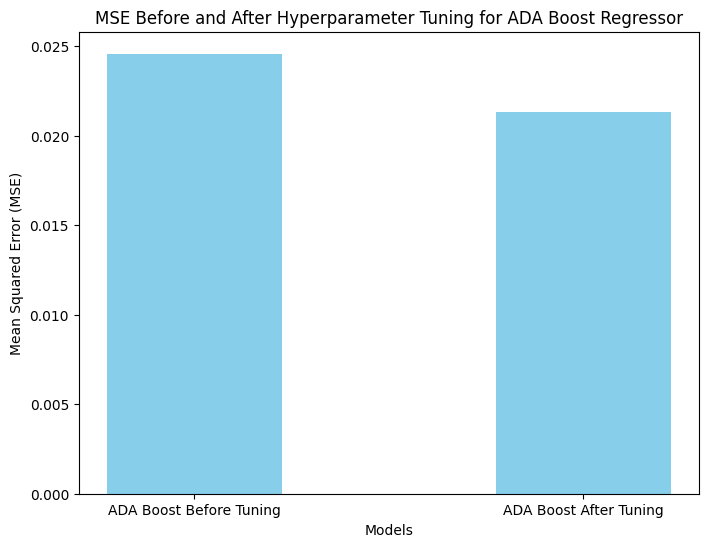

In [154]:
# Bar plot
models_names = ['ADA Boost Before Tuning', 'ADA Boost After Tuning']

plt.figure(figsize=(8, 6))
bar_width = 0.45
index = np.arange(len(models_names))

plt.bar(index, [mse_before_tuning_ADA, mse_after_tuning_ADA], width=bar_width, color='skyblue')

plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Before and After Hyperparameter Tuning for ADA Boost Regressor')
plt.xticks(index, models_names)
plt.show()

In [155]:
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression

# Assuming you have regressors named 'opt', 'model', and 'model1', and features 'X_train' and labels 'Y_train', and test set 'X_test' and 'Y_test'

# Hard Voting Regressor
vhard = VotingRegressor(estimators=[
    ('XG BOOST', xg_reg),
    ('linear Regression', lin_reg),
    ('Decision Tree', tree)
])

# Soft Voting Regressor
vsoft = VotingRegressor(estimators=[
    ('XG BOOST', xg_reg),
    ('linear Regression', lin_reg),
    ('Decision Tree', tree)
])

# Stacking Regressor Ensemble
meta_regressor = StackingRegressor(estimators=[
    ('XG BOOST', xg_reg),
    ('linear Regression', lin_reg),
    ('Decision Tree', tree)
], final_estimator=LinearRegression())

vhard.fit(X_train_scaled, Y_train_scaled)
vsoft.fit(X_train_scaled, Y_train_scaled)
meta_regressor.fit(X_train_scaled, Y_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_stacking.py:957: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StackingRegressor(estimators=[('XG BOOST',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learnin...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('linear Regression', LinearRegression()),
                              ('Decision Tree',
                               DecisionTreeRegressor(max_depth=5,
                                                     min_samples_split=500))],
                  final_estimator=LinearRegression())

In [157]:
hard_voting_pred = vhard.predict(X_test_scaled)
print("Hard Voting Predictions: ", hard_voting_pred)
ensemble_mse = mean_squared_error(Y_test_scaled, hard_voting_pred)
print("\n Mean Squared Error of Hard Voting Ensemble on Test Set:", ensemble_mse)

soft_voting_pred = vsoft.predict(X_test_scaled)
print("Soft Voting Predictions: ", soft_voting_pred)
ensemble_mse = mean_squared_error(Y_test_scaled, soft_voting_pred)
print("\n Mean Squared Error of Soft Voting Ensemble on Test Set:", ensemble_mse)


stacking_pred = meta_regressor.predict(X_test_scaled)
print("Stacking Regressor Ensemble Predictions:", stacking_pred)
ensemble_mse = mean_squared_error(Y_test_scaled, stacking_pred)
print("\n Mean Squared Error of Stacking Regressor Ensemble on Test Set:", ensemble_mse)

Hard Voting Predictions:  [ 0.83988483  2.99995981  0.02202672 ... -0.48000628  0.55093914
  0.5282607 ]

 Mean Squared Error of Hard Voting Ensemble on Test Set: 0.005808185427905952
Soft Voting Predictions:  [ 0.83988483  2.99995981  0.02202672 ... -0.48000628  0.55093914
  0.5282607 ]

 Mean Squared Error of Soft Voting Ensemble on Test Set: 0.005808185427905948
Stacking Regressor Ensemble Predictions: [ 0.77836289  2.96020051 -0.03094028 ... -0.50667931  0.45026701
  0.5760371 ]

 Mean Squared Error of Stacking Regressor Ensemble on Test Set: 0.0027843554445994667


# Comparison of MSE error for all models:

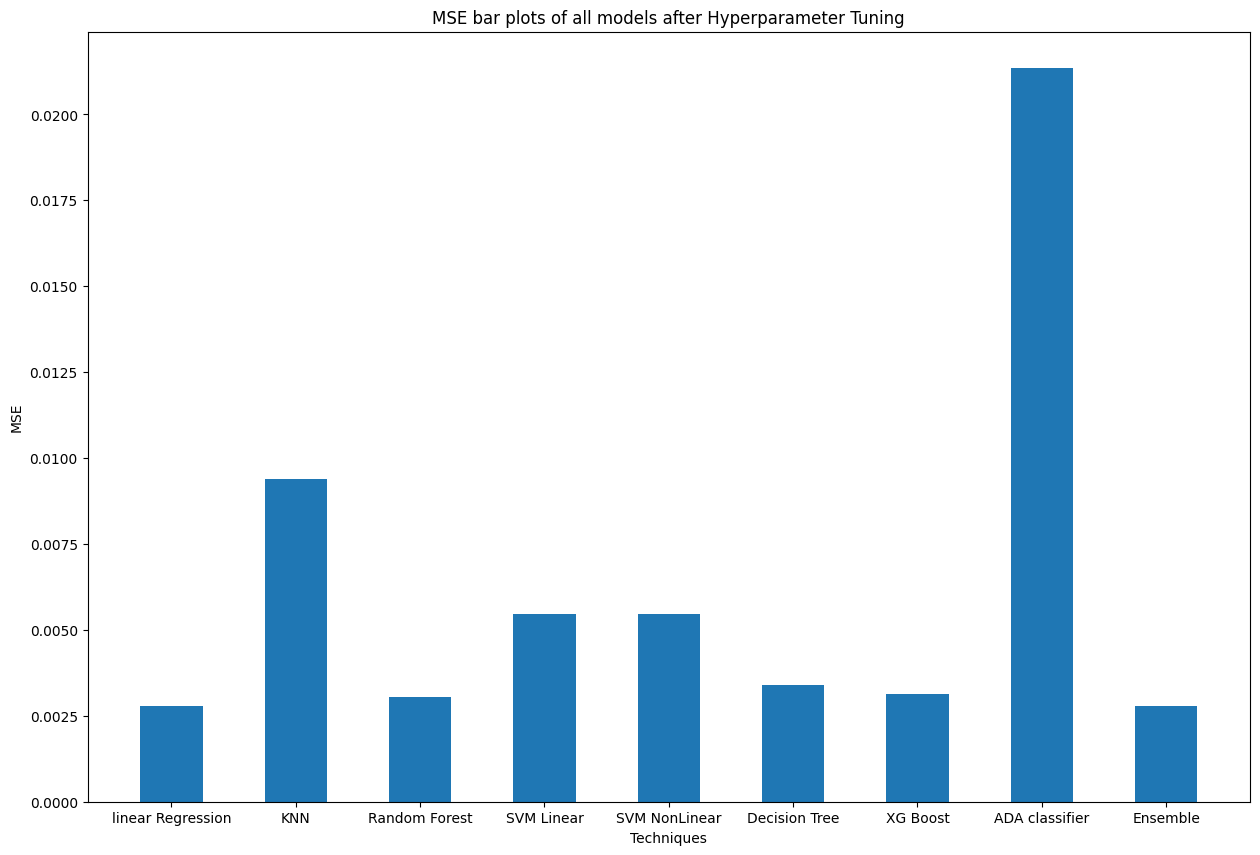

In [165]:
#Visualization of MSE after Hyperparameter tuning
#mse_train=[mse_train_linreg,mse_train_knn,mse_train_forest,mse_train_linear,mse_train_nonlinear,mse_train_tree]
mse_test_after_tuning=[mse_linear_after_tuning,mse_knn_after_tuning,mse_rf_after_tuning,mse_svm_linear_after_tuning,mse_svm_nonlinear_after_tuning,mse_dt_after_tuning,mse_after_tuning_XGB,mse_after_tuning_ADA,ensemble_mse]

labels=['linear Regression','KNN','Random Forest','SVM Linear','SVM NonLinear','Decision Tree','XG Boost','ADA classifier','Ensemble']



fig = plt.figure(figsize =(15, 10))

plt.bar(labels,mse_test_after_tuning,width=0.5)

plt.xlabel("Techniques")
plt.ylabel("MSE")
plt.title("MSE bar plots of all models after Hyperparameter Tuning")

plt.show()

# OBSERVATION FOR BAR PLOT:


Observing the mean squared error (MSE) of different machine learning models can offer valuable insights into their performance.

The model that performed the best was Linear Regression and Ensemble method having their MSE much lower than the rest of the models. Among Linear Regression and Ensemble method it's better to choose Ensemble method because Ensembeles work by combining the predictions of multiple models, often provide better predictive accuracy than individual models. If achieving the lowest possible Mean Squared Error is a top priority, an ensemble model might be more suitable. Ensembles are robust to outliers and noise in the data.

The MSE of both SVM linear and non linear are almost the same could indicate that the underlying relationship between the input features and the target variable is effectively linear. This means that the added complexity of a non-linear kernel in the SVM did not contribute significantly to improving predictive performance.
